In [1]:
import pandas as pd

from arcgis.map.renderers import UniqueValueRenderer
from arcgis.gis import GIS

In [2]:
agol_gis = GIS("https://www.arcgis.com", "cassidymaciel", "Bailey131!")

<Item title:"wjm_Commercial Permits since 2010" type:Feature Layer Collection owner:u3634636_hkufbe>
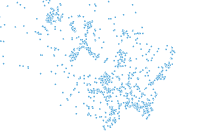

In [3]:
data = agol_gis.content.search("title: Commercial Permits since 2010", "Feature layer",
                               outside_org=True)
data[0]

In [4]:
permits = data[0]

In [5]:
permit_layer = permits.layers[0]

In [6]:
permit_map = agol_gis.map("Montgomery County, Maryland")
permit_map

Map(center=[4741230.6567386985, -8594330.129968889], extent={'xmin': -8623829.795029107, 'ymin': 4703269.50202…

In [7]:
permit_map.content.add(permit_layer)

In [8]:


permit_layer



<FeatureLayer url:"https://services9.arcgis.com/aJFEkAYERwjt5yhZ/arcgis/rest/services/wjm_Commercial_Permits_since_2010_whKQ97/FeatureServer/0">

In [10]:
sdf = pd.DataFrame.spatial.from_layer(permit_layer)

C:\Users\Administrator\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'services9.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'services9.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'services9.arcgis.com'. Adding

In [11]:


sdf.tail()



,objectid,rowid,fid,permit_num,status,latitude,longitude,address,city,state,...,second_issue_date,year_final_date,quarter_final_date,month_final_date,dayofmonth_final_date,dayofweek_final_date,hour_final_date,minute_final_date,second_final_date,SHAPE
7507,5546,5546,0,549203,Issued,39.023668,-77.187683,10130 DEMOCRACY BLVD,POTOMAC,MD,...,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": -77.187683, ""y"": 39.023668, ""spatialRefe..."
7508,5547,5547,0,549198,Issued,39.041941,-77.192472,11430 FALLS RD,POTOMAC,MD,...,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": -77.192472, ""y"": 39.041941, ""spatialRefe..."
7509,5549,5549,0,549677,Issued,38.974913,-77.141543,6513 LAVEROCK LN,BETHESDA,MD,...,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": -77.141543, ""y"": 38.974913, ""spatialRefe..."
7510,5550,5550,0,535431,Issued,39.229038,-77.280314,22520 GATEWAY CENTER DR,CLARKSBURG,MD,...,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": -77.280314, ""y"": 39.229038, ""spatialRefe..."
7511,5551,5551,0,549682,Issued,39.063606,-77.292948,14100 RIVER RD,POTOMAC,MD,...,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": -77.292948, ""y"": 39.063606, ""spatialRefe..."


In [12]:
sdf.rename(columns=lambda x: x.lower() if x != "SHAPE" else x, inplace=True)
sdf.columns

Index(['objectid', 'rowid', 'fid', 'permit_num', 'status', 'latitude',
       'longitude', 'address', 'city', 'state', 'zip_code', 'added_date',
       'issue_date', 'final_date', 'building_a', 'declared_v', 'descriptio',
       'applicatio', 'work_type', 'use_code', 'location', 'bldgareanu',
       'declvalnu', 'year_added_date', 'quarter_added_date',
       'month_added_date', 'dayofmonth_added_date', 'dayofweek_added_date',
       'hour_added_date', 'minute_added_date', 'second_added_date',
       'year_issue_date', 'quarter_issue_date', 'month_issue_date',
       'dayofmonth_issue_date', 'dayofweek_issue_date', 'hour_issue_date',
       'minute_issue_date', 'second_issue_date', 'year_final_date',
       'quarter_final_date', 'month_final_date', 'dayofmonth_final_date',
       'dayofweek_final_date', 'hour_final_date', 'minute_final_date',
       'second_final_date', 'SHAPE'],
      dtype='object')

In [13]:


sdf.dtypes



objectid                          Int64
rowid                             Int32
fid                               Int32
permit_num                        Int32
status                   string[python]
latitude                        Float64
longitude                       Float64
address                  string[python]
city                     string[python]
state                    string[python]
zip_code                          Int32
added_date               datetime64[ns]
issue_date               datetime64[ns]
final_date               datetime64[ns]
building_a                      Float64
declared_v                      Float64
descriptio               string[python]
applicatio               string[python]
work_type                string[python]
use_code                 string[python]
location                 string[python]
bldgareanu                      Float64
declvalnu                       Float64
year_added_date                   Int32
quarter_added_date                Int32


In [14]:


sdf["work_type"].unique()



<StringArray>
[                     'ALTER',                  'CONSTRUCT',
           'BUILD FOUNDATION',    'RESTORE AND / OR REPAIR',
                        'ADD',   'COMMERCIAL CHANGE OF USE',
                    'REPLACE', 'CONSTRUCT SHEETING/SHORING',
                    'INSTALL',              'FINAL ONLY AP']
Length: 10, dtype: string

In [15]:


sdf["status"].unique()



<StringArray>
['Finaled', 'Issued', 'Open', 'Stop Work']
Length: 4, dtype: string

In [16]:


sdf["use_code"].unique()



<StringArray>
[           'MERCANTILE BUILDING',              'BUSINESS BUILDING',
          'MULTI-FAMILY DWELLING', 'COMMERCIAL MISCELLANEOUS STRUC']
Length: 4, dtype: string

In [17]:


permits_by_status = sdf.groupby(sdf["status"]).size()
permits_by_status



status
Finaled      3860
Issued       2997
Open          455
Stop Work     200
dtype: int64

In [18]:


%matplotlib inline
import matplotlib.pyplot as plt



<Axes: ylabel='Permits by Status'>

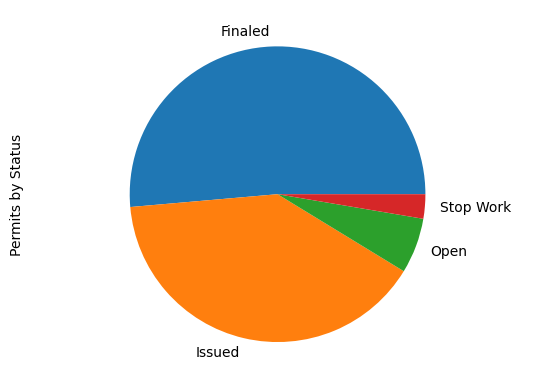

In [19]:


plt.axis("equal")
permits_by_status.plot(kind="pie", legend=False, label="Permits by Status")



In [20]:
permits_by_status_map = agol_gis.map("Montgomery County, Maryland")
permits_by_status_map

Map(center=[4741230.6567386985, -8594330.129968889], extent={'xmin': -8623829.795029107, 'ymin': 4703269.50202…

In [21]:
status_value_infos = [
    {
        "value": "Stop Work",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSCircle",
            "color": [205, 51, 46, 255],
            "size": 6,
        },
    },
    {
        "value": "Issued",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSCircle",
            "color": [246, 132, 34, 255],
            "size": 6,
        },
    },
    {
        "value": "Open",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSCircle",
            "color": [60, 159, 48, 255],
            "size": 6,
        },
    },
    {
        "value": "Finaled",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSCircle",
            "color": [54, 117, 179, 255],
            "size": 6,
        },
    }
]

In [22]:
sdf.spatial.plot(
    map_widget=permits_by_status_map,
    renderer=UniqueValueRenderer(
        field1="status",
        unique_value_infos=status_value_infos
    )
)

True

In [23]:
permits_by_type = sdf.groupby(["use_code"]).size()
permits_by_type

use_code
BUSINESS BUILDING                 3461
COMMERCIAL MISCELLANEOUS STRUC    1197
MERCANTILE BUILDING               1016
MULTI-FAMILY DWELLING             1838
dtype: int64

In [24]:
permits_by_type.sort_values(ascending=False, inplace=True)
permits_by_type.head()

use_code
BUSINESS BUILDING                 3461
MULTI-FAMILY DWELLING             1838
COMMERCIAL MISCELLANEOUS STRUC    1197
MERCANTILE BUILDING               1016
dtype: int64

In [25]:
sdf.drop(["declared_v", "building_a", "applicatio"], axis=1, inplace=True)

In [26]:


sdf.columns



Index(['objectid', 'rowid', 'fid', 'permit_num', 'status', 'latitude',
       'longitude', 'address', 'city', 'state', 'zip_code', 'added_date',
       'issue_date', 'final_date', 'descriptio', 'work_type', 'use_code',
       'location', 'bldgareanu', 'declvalnu', 'year_added_date',
       'quarter_added_date', 'month_added_date', 'dayofmonth_added_date',
       'dayofweek_added_date', 'hour_added_date', 'minute_added_date',
       'second_added_date', 'year_issue_date', 'quarter_issue_date',
       'month_issue_date', 'dayofmonth_issue_date', 'dayofweek_issue_date',
       'hour_issue_date', 'minute_issue_date', 'second_issue_date',
       'year_final_date', 'quarter_final_date', 'month_final_date',
       'dayofmonth_final_date', 'dayofweek_final_date', 'hour_final_date',
       'minute_final_date', 'second_final_date', 'SHAPE'],
      dtype='object')

In [27]:
sdf.rename(columns={"descriptio": "Description", "bldgareanu": "Building_Area",
           "declvalnu": "Declared_Value"}, inplace=True)

In [28]:


sdf.columns



Index(['objectid', 'rowid', 'fid', 'permit_num', 'status', 'latitude',
       'longitude', 'address', 'city', 'state', 'zip_code', 'added_date',
       'issue_date', 'final_date', 'Description', 'work_type', 'use_code',
       'location', 'Building_Area', 'Declared_Value', 'year_added_date',
       'quarter_added_date', 'month_added_date', 'dayofmonth_added_date',
       'dayofweek_added_date', 'hour_added_date', 'minute_added_date',
       'second_added_date', 'year_issue_date', 'quarter_issue_date',
       'month_issue_date', 'dayofmonth_issue_date', 'dayofweek_issue_date',
       'hour_issue_date', 'minute_issue_date', 'second_issue_date',
       'year_final_date', 'quarter_final_date', 'month_final_date',
       'dayofmonth_final_date', 'dayofweek_final_date', 'hour_final_date',
       'minute_final_date', 'second_final_date', 'SHAPE'],
      dtype='object')

In [29]:


permits_by_type.head(4)  # top 4 Use_Codes



use_code
BUSINESS BUILDING                 3461
MULTI-FAMILY DWELLING             1838
COMMERCIAL MISCELLANEOUS STRUC    1197
MERCANTILE BUILDING               1016
dtype: int64

In [30]:


filtered_permits = list(permits_by_type.head(4).index)
filtered_permits



['BUSINESS BUILDING',
 'MULTI-FAMILY DWELLING',
 'COMMERCIAL MISCELLANEOUS STRUC',
 'MERCANTILE BUILDING']

In [31]:


filtered_df = sdf.loc[sdf["use_code"].isin(filtered_permits)]



In [32]:


filtered_df.head()



,objectid,rowid,fid,permit_num,status,latitude,longitude,address,city,state,...,second_issue_date,year_final_date,quarter_final_date,month_final_date,dayofmonth_final_date,dayofweek_final_date,hour_final_date,minute_final_date,second_final_date,SHAPE
0,547,547,0,541051,Finaled,39.15156,-77.063749,3132 OLNEY SANDY SPRING RD,OLNEY,MD,...,0,2010,4,11,2,2,0,0,0,"{""x"": -77.063749, ""y"": 39.15156, ""spatialRefer..."
1,548,548,0,543486,Finaled,39.189202,-77.252649,20314 SENECA MEADOWS PKWY,GERMANTOWN,MD,...,0,2010,4,10,18,1,0,0,0,"{""x"": -77.252649, ""y"": 39.189202, ""spatialRefe..."
2,550,550,0,542059,Finaled,39.230351,-77.258367,22934 TURTLE ROCK TER,CLARKSBURG,MD,...,0,2011,1,3,11,5,0,0,0,"{""x"": -77.258367, ""y"": 39.230351, ""spatialRefe..."
3,551,551,0,537108,Finaled,39.082065,-77.076951,13830 GEORGIA AVE,SILVER SPRING,MD,...,0,2011,4,10,13,4,0,0,0,"{""x"": -77.076951, ""y"": 39.082065, ""spatialRefe..."
4,553,553,0,543714,Finaled,38.986563,-77.096378,7710 WOODMONT AVE,BETHESDA,MD,...,0,2011,3,8,5,5,0,0,0,"{""x"": -77.096378, ""y"": 38.986563, ""spatialRefe..."


In [33]:


sdf.shape, filtered_df.shape



((7512, 45), (7512, 45))

In [34]:


filtered_map = agol_gis.map("Montgomery County, Maryland")
filtered_map



Map(center=[4741230.6567386985, -8594330.129968889], extent={'xmin': -8623829.795029107, 'ymin': 4703269.50202…

In [35]:


use_code_value_infos = [
    {
        "value": "MULTI-FAMILY DWELLING",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSDiamond",
            "color": [75, 210, 254, 255],
            "size": 6,
        },
    },
    {
        "value": "MERCANTILE BUILDING",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSDiamond",
            "color": [250, 230, 38, 255],
            "size": 6,
        },
    },
    {
        "value": "BUSINESS BUILDING",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSDiamond",
            "color": [121, 14, 6, 255],
            "size": 6,
        },
    },
    {
        "value": "COMMERCIAL MISCELLANEOUS STRUC",
        "symbol": {
            "type": "esriSMS",
            "style": "esriSMSDiamond",
            "color": [19, 0, 126, 255],
            "size": 6,
        },
    }
]



In [36]:
filtered_df.spatial.plot(
    map_widget=filtered_map,
    renderer=UniqueValueRenderer(
        field1="use_code",
        unique_value_infos=use_code_value_infos
    )
)

True

In [37]:
sdf["datetime"] = pd.to_datetime(sdf["added_date"], unit="ms")
sdf["year"], sdf["month"], sdf["day_of_week"] = sdf.datetime.dt.year, sdf.datetime.dt.month, sdf.datetime.dt.dayofweek

In [38]:
import seaborn as sns

In [39]:
sns.set_palette("colorblind")

<Axes: xlabel='year', ylabel='count'>

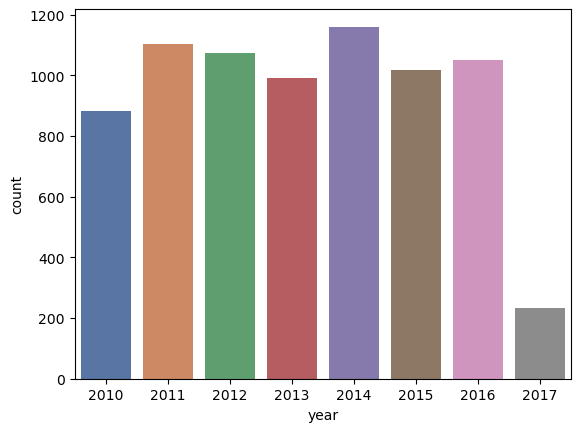

In [40]:
sns.countplot(data=sdf, x="year", hue="year", palette="deep", legend=False)

<Axes: xlabel='month', ylabel='count'>

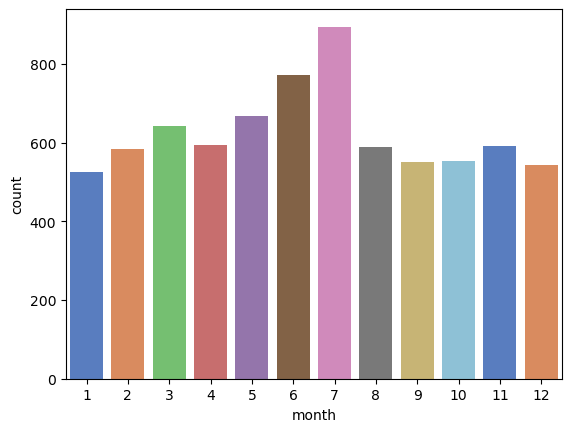

In [41]:
sns.countplot(data=sdf, x="month", hue="month", palette="muted", legend=False)

<Axes: xlabel='day_of_week', ylabel='count'>

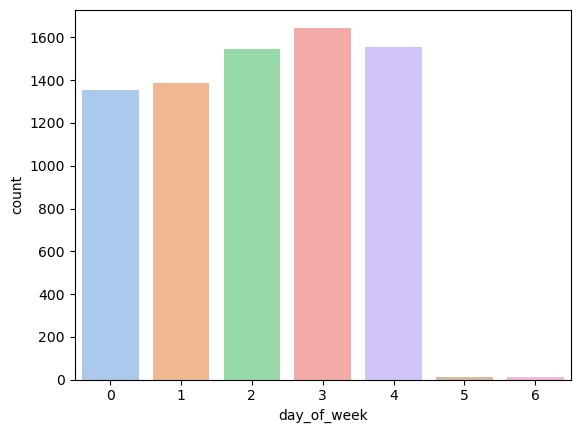

In [42]:
sns.countplot(data=sdf, x="day_of_week", hue="day_of_week",
              palette="pastel", legend=False)

In [43]:
ddf = sdf.set_index("datetime")

C:/Users/ADMINI~1/AppData/Local/Temp/2/ArcGISProTemp4444/xpython_4444/2200298527.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ddf["num"].resample("M").sum().plot()


<Axes: xlabel='datetime'>

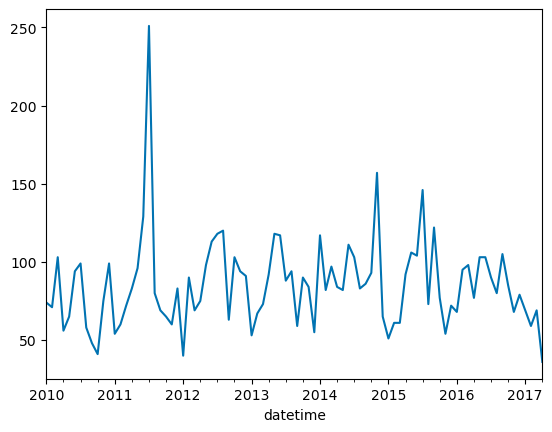

In [44]:
ddf["num"] = 1
ddf["num"].resample("M").sum().plot()

C:/Users/ADMINI~1/AppData/Local/Temp/2/ArcGISProTemp4444/xpython_4444/3655176752.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax.plot(ddf["num"].resample("M").sum(), "k", label="Total permits")
C:/Users/ADMINI~1/AppData/Local/Temp/2/ArcGISProTemp4444/xpython_4444/3655176752.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  x = ddf[ddf.use_code == use_code]["num"].resample("M").sum()
C:/Users/ADMINI~1/AppData/Local/Temp/2/ArcGISProTemp4444/xpython_4444/3655176752.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  x = ddf[ddf.use_code == use_code]["num"].resample("M").sum()
C:/Users/ADMINI~1/AppData/Local/Temp/2/ArcGISProTemp4444/xpython_4444/3655176752.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  x = ddf[ddf.use_code == use_code]["num"].resample("M").sum

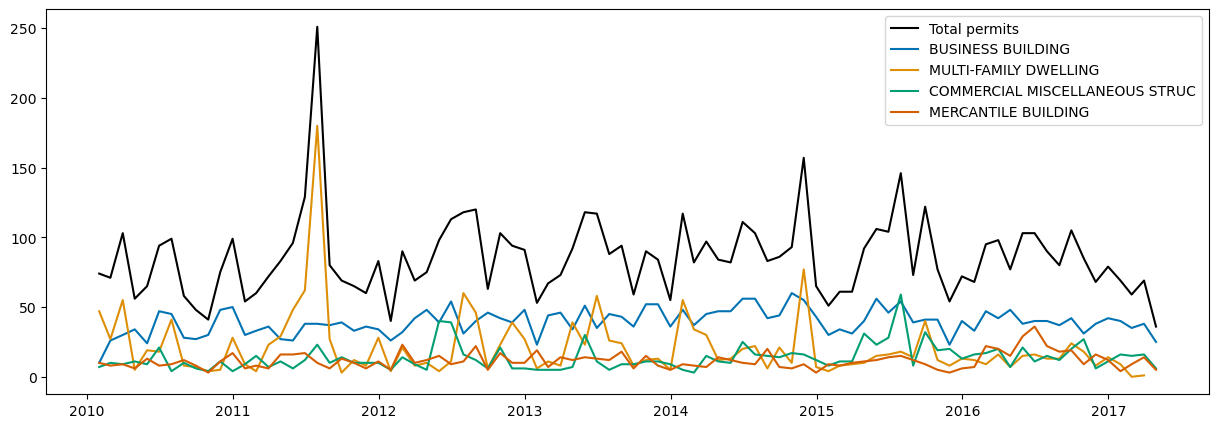

In [45]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(ddf["num"].resample("M").sum(), "k", label="Total permits")
for use_code in filtered_permits:
    x = ddf[ddf.use_code == use_code]["num"].resample("M").sum()
    ax.plot(x, label=use_code)
ax.legend()

In [46]:
hotspot_map = agol_gis.map("Germantown, Montgomery County, Maryland")
hotspot_map

Map(center=[4747049.068218427, -8601674.976034267], extent={'xmin': -8607129.631083138, 'ymin': 4740015.058140…

In [47]:
sdf.spatial.plot(hotspot_map)

True

In [48]:
sdf_sm = hotspot_map.content.renderer(0).smart_mapping()
sdf_sm.heatmap_renderer()

In [49]:
hotspot_2011_map = agol_gis.map("Germantown, Montgomery County, Maryland")
hotspot_2011_map

Map(center=[4747049.068218427, -8601674.976034267], extent={'xmin': -8607129.631083138, 'ymin': 4740015.058140…

In [50]:
sdf.loc[sdf.year == 2011].copy().spatial.plot(map_widget=hotspot_2011_map)

True

In [51]:
sedf_2011_sm = hotspot_2011_map.content.renderer(0).smart_mapping()
sedf_2011_sm.heatmap_renderer()